In [209]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

Data Normalization

In [210]:
# Load the data into a pandas DataFrame
data = pd.read_csv('Cleaned_Data.csv')

# Separate the numerical and categorical columns
numerical_cols = data.select_dtypes(include=['float64']).columns
categorical_cols = ['Primary streaming service', 'While working','Instrumentalist','Composer','Fav genre','Exploratory','Foreign languages','Frequency [Classical]','Frequency [Country]','Frequency [EDM]','Frequency [Folk]','Frequency [Gospel]','Frequency [Hip hop]','Frequency [Jazz]','Frequency [K pop]','Frequency [Latin]','Frequency [Lofi]','Frequency [Metal]','Frequency [Pop]','Frequency [R&B]','Frequency [Rap]','Frequency [Rock]','Frequency [Video game music]','Music effects']

# Perform normalization on numerical data
scaler = MinMaxScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Perform encoding on categorical data
encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])

# Print the normalized and encoded data
data

Age  Primary streaming service  Hours per day  While working  \
0    0.133333                          4       0.214286              1   
1    0.883333                          3       0.107143              1   
2    0.133333                          4       0.285714              0   
3    0.850000                          5       0.178571              1   
4    0.133333                          4       0.285714              1   
..        ...                        ...            ...            ...   
709  0.116667                          4       0.142857              1   
710  0.133333                          4       0.071429              1   
711  0.150000                          2       0.428571              1   
712  0.150000                          4       0.357143              1   
713  0.316667                          5       0.142857              1   

     Instrumentalist  Composer  Fav genre  Exploratory  Foreign languages  \
0                  1         1          8            1                  1   
1                  0         0         14            1                  0   
2                  0         0         15            0                  1   
3                  0         1          6            1                  1   
4                  0         0         12            1                  0   
..               ...       ...        ...          ...                ...   
709                1         0         14            1                  1   
710                1         0         11            1                  1   
711                0         1         13            1                  0   
712                1         0          0            0                  0   
713                0         0          5            1                  1   

       BPM  ...  Frequency [Pop]  Frequency [R&B]  Frequency [Rap]  \
0    0.780  ...                3                2                3   
1    0.595  ...                2                2                1   
2    0.660  ...                1                0                1   
3    0.420  ...                2                2                0   
4    0.535  ...                2                3                3   
..     ...  ...              ...              ...              ...   
709  0.600  ...                3                0                1   
710  0.800  ...                3                0                0   
711  0.600  ...                2                2                2   
712  0.850  ...                0                0                0   
713  0.490  ...                2                3                3   

     Frequency [Rock]  Frequency [Video game music]  Anxiety  Depression  \
0                   0                             2      0.3         0.0   
1                   3                             1      0.7         0.2   
2                   1                             3      0.7         0.7   
3                   0                             0      0.9         0.7   
4                   0                             1      0.7         0.2   
..                ...                           ...      ...         ...   
709                 3                             0      0.7         0.6   
710                 2                             2      0.3         0.2   
711                 1                             1      0.2         0.2   
712                 0                             2      0.2         0.3   
713                 3                             1      0.2         0.2   

     Insomnia  OCD  Music effects  
0         0.1  0.0              0  
1         0.2  0.1              0  
2         1.0  0.2              1  
3         0.3  0.3              0  
4         0.5  0.9              0  
..        ...  ...            ...  
709       0.0  0.9              0  
710       0.2  0.5              0  
711       0.2  0.2              0  
712       0.2  0.1              0  
713       0.2  0.5              0  

[714 rows

Decision Tree

                         Feature  Importance
0                            Age    0.075920
9                            BPM    0.066250
26                       Anxiety    0.065163
27                    Depression    0.059458
2                  Hours per day    0.051456
28                      Insomnia    0.049962
29                           OCD    0.048801
6                      Fav genre    0.048407
15           Frequency [Hip hop]    0.034209
20             Frequency [Metal]    0.031673
22               Frequency [R&B]    0.030968
1      Primary streaming service    0.030588
25  Frequency [Video game music]    0.030436
21               Frequency [Pop]    0.029081
24              Frequency [Rock]    0.028097
19              Frequency [Lofi]    0.027047
12               Frequency [EDM]    0.026243
13              Frequency [Folk]    0.026008
10         Frequency [Classical]    0.026002
3                  While working    0.024591
18             Frequency [Latin]    0.023163
16        

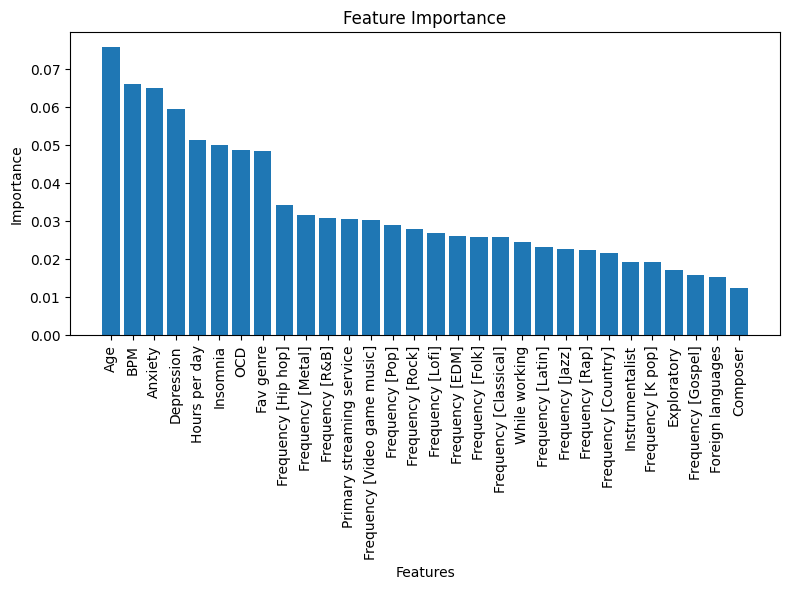

In [211]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report
import matplotlib.pyplot as plt

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame with feature names and importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importances)

# Plot the feature importances
plt.figure(figsize=(8, 6))
plt.bar(feature_importances['Feature'], feature_importances['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

In [220]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report
from sklearn.feature_selection import RFE

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=100)

# Initialize the Random Forest classifier with desired parameters
RanFor = RandomForestClassifier(n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_depth=10,
                                max_features='sqrt')

# Perform Recursive Feature Elimination (RFE)
rfe = RFE(RanFor, n_features_to_select=10)  # Select top 10 features
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Train the Random Forest classifier on the selected features
RanFor.fit(X_train_rfe, y_train)

# Make predictions on the test set
y_pred = RanFor.predict(X_test_rfe)

# Inverse transform the encoded labels to get the original string labels
y_test_original = encoder.inverse_transform(y_test)
y_pred_original = encoder.inverse_transform(y_pred)

# Calculate evaluation metrics
Acc_ran = round(accuracy_score(y_test, y_pred), 3)
f1_ran = round(f1_score(y_test, y_pred, average='weighted', zero_division=1), 3)
recall_ran = round(recall_score(y_test, y_pred, average='weighted', zero_division=1), 3)
precision_ran = round(precision_score(y_test, y_pred, average='weighted', zero_division=1), 3)

# Print evaluation metrics
print('Accuracy:', Acc_ran)
print('F1 Score:', f1_ran)
print('Recall Score:', recall_ran)
print('Precision Score:', precision_ran)
print('Cross Validation Score:', round(np.mean(cross_val_score(RanFor, X_train_rfe, y_train, cv=6)), 3))

# Generate classification report with original string labels
classification = classification_report(y_true=y_test_original, y_pred=y_pred_original, digits=4, zero_division=1)
print(classification)

Accuracy: 0.784
F1 Score: 0.712
Recall Score: 0.784
Precision Score: 0.749
Cross Validation Score: 0.726
              precision    recall  f1-score   support

     Improve     0.7901    0.9846    0.8767       195
   No effect     0.5714    0.0784    0.1379        51
      Worsen     1.0000    0.0000    0.0000         4

    accuracy                         0.7840       250
   macro avg     0.7872    0.3543    0.3382       250
weighted avg     0.7489    0.7840    0.7120       250

